#PREDICCIÓN DE TEMPERATURA PARA EL DEPARTAMENTO DE SANTANDER

#FASE 1

## DESCRIPCIÓN DEL DATASET Y PROYECTO:
Este proyecto busca predecir la temperatura para el departamento de Santander a partir de datos meteorológicos.

El conjunto de datos contiene información hidrometeorológica proveniente de estaciones meteorológicas ubicadas en el departamento de Santander, Colombia . Su enfoque principal es la medición de la temperatura del aire, capturada mediante sensores distribuidos en diferentes municipios del departamento.

Este conjunto de datos permite analizar el comportamiento térmico en diferentes municipios de Santander, identificando patrones estacionales, tendencias de calentamiento o enfriamiento y posibles anomalías térmicas en la región.

La predicción de la temperatura es un tema clave no solo para la planificación diaria, sino también para la gestión de sectores como la agricultura, el turismo y la salud pública, que dependen del clima.

In [ ]:
import os
from google.colab import drive

path_ai = "Proyecto-IA" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1JuvK8Ju1jgSrgYtHSoL7blfX2lNzA3mJ/Proyecto-IA


## Librerias necesarias

In [ ]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import make_scorer, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN




##Cargue del Dataset

In [ ]:
file_path = "Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20250310 (1).csv"
meteor =  pd.read_csv(file_path)
meteor.head()

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,24055080,68,01/01/2025 03:00:00 AM,24.8,VIZCAINA LA LIZAMA,SANTANDER,BARRANCABERMEJA,SOGAMOSO,6.982970,-73.704890,TEMPERATURA DEL AIRE A 2 m,°C
1,23195040,68,01/01/2025 03:00:00 AM,22.1,UNIVERSIDAD INDUSTRIAL SANTANDER,SANTANDER,BUCARAMANGA,MEDIO MAGDALENA,7.144722,-73.122222,TEMPERATURA DEL AIRE A 2 m,°C
2,23190700,68,01/01/2025 11:00:00 AM,18.2,PIEDECUESTA GRANJA,SANTANDER,PIEDECUESTA,MEDIO MAGDALENA,6.993330,-73.067780,TEMPERATURA DEL AIRE A 2 m,°C
3,23190700,68,01/01/2025 04:00:00 AM,21.6,PIEDECUESTA GRANJA,SANTANDER,PIEDECUESTA,MEDIO MAGDALENA,6.993330,-73.067780,TEMPERATURA DEL AIRE A 2 m,°C
4,23195502,68,01/01/2025 11:00:00 AM,18.4,AEROPUERTO PALONEGRO,SANTANDER,LEBRIJA,MEDIO MAGDALENA,7.121472,-73.184528,TEMPERATURA DEL AIRE A 2 m,°C


##Funcion Describe

In [ ]:
meteor.describe()

,CodigoEstacion,CodigoSensor,ValorObservado,Latitud,Longitud
count,8.526200e+04,85262.000000,85262.000000,85262.000000,85262.000000
mean,1.306600e+08,69.684830,21.645510,7.060466,-73.227768
std,4.875551e+08,1.488578,4.819027,0.273567,0.220054
min,2.312512e+07,68.000000,0.000000,5.796417,-73.952222
25%,2.319550e+07,68.000000,19.400000,7.121472,-73.184528
50%,2.319550e+07,71.000000,21.300000,7.121472,-73.184528
75%,2.319550e+07,71.000000,24.800000,7.121472,-73.184528
max,2.401500e+09,71.000000,36.200000,7.473890,-72.858972


Limpieza de datos:

In [ ]:
# Convertir la fecha a formato datetime
meteor["FechaObservacion"] = pd.to_datetime(meteor["FechaObservacion"], format="%m/%d/%Y %I:%M:%S %p", errors="coerce")

# Eliminar valores nulos solo en columnas críticas (FechaObservacion y ValorObservado)
meteor_cleaned = meteor.dropna(subset=["FechaObservacion", "ValorObservado"])

# Filtrar solo la temperatura del aire
meteor_cleaned = meteor_cleaned[meteor_cleaned["DescripcionSensor"] == "TEMPERATURA DEL AIRE A 2 m"]

# Ordenar por fecha
meteor_cleaned = meteor_cleaned.sort_values(by="FechaObservacion")

# Eliminar columnas irrelevantes
columns_to_drop = ["CodigoSensor", "UnidadMedida"]
meteor_cleaned = meteor_cleaned.drop(columns=columns_to_drop)

# Mostrar el dataset limpio
print("Descripción estadística del dataset después de la limpieza:")
meteor_cleaned.describe()



Descripción estadística del dataset después de la limpieza:


,CodigoEstacion,FechaObservacion,ValorObservado,Latitud,Longitud
count,3.737800e+04,37378,37378.000000,37378.000000,37378.000000
mean,2.683301e+08,2025-01-24 06:14:12.035956992,21.528530,6.982312,-73.283162
min,2.312512e+07,2025-01-01 00:00:00,0.000000,5.796417,-73.952222
25%,2.319044e+07,2025-01-10 05:00:00,17.400000,6.823390,-73.489444
50%,2.319520e+07,2025-01-19 16:00:00,22.300000,7.121472,-73.184528
75%,2.405508e+07,2025-01-29 01:00:00,25.800000,7.211083,-72.991110
max,2.401500e+09,2025-03-09 23:00:00,36.200000,7.473890,-72.858972
std,7.130875e+08,NaN,6.408653,0.399799,0.324030


In [ ]:
print(f"Filas: {meteor_cleaned.shape[0]}, Columnas: {meteor_cleaned.shape[1]}")


Filas: 37378, Columnas: 10


### Distribución de la Temperatura (ValorObservado)
Se genera un histograma para visualizar la distribución de los valores de temperatura observados en el dataset limpio. Esto ayuda a identificar la forma de la distribución, valores atípicos y el rango de temperaturas.

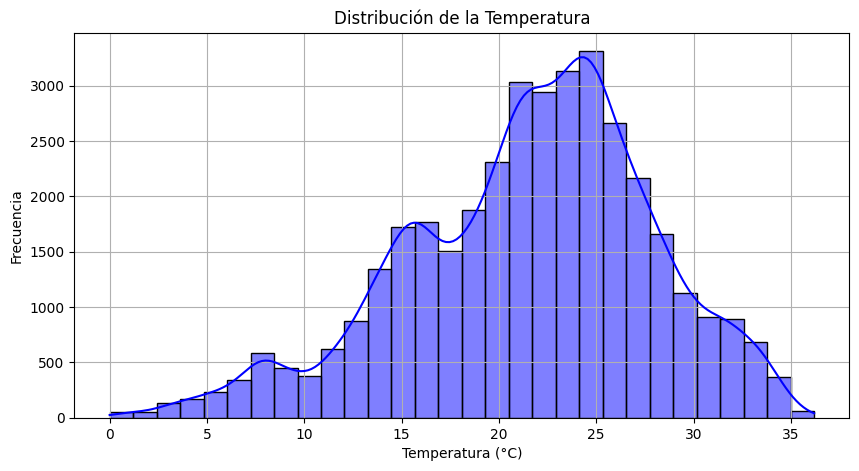

In [ ]:
# Histograma de temperatura
plt.figure(figsize=(10, 5))
sns.histplot(meteor_cleaned["ValorObservado"], bins=30, kde=True, color="blue")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Temperatura")
plt.grid()
plt.show()


### Variación de la Temperatura en el Tiempo (FechaObservacion vs ValorObservado)
 Este gráfico de dispersión (o línea con puntos) muestra cómo varía la temperatura a lo largo del tiempo según las fechas de observación en el dataset limpio. Permite identificar tendencias generales o patrones estacionales.

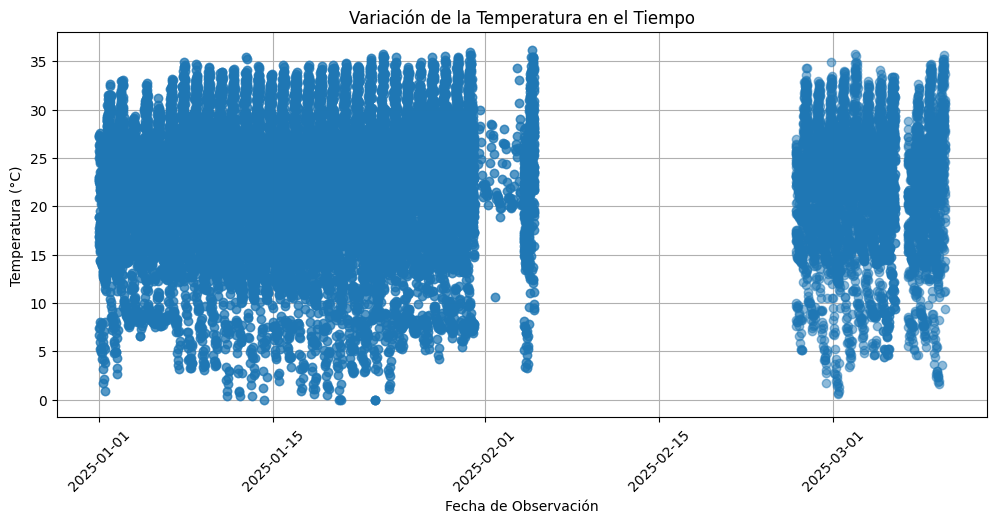

In [ ]:

plt.figure(figsize=(12, 5))
plt.plot(meteor_cleaned["FechaObservacion"], meteor_cleaned["ValorObservado"], marker='o', linestyle='', alpha=0.5)
plt.xlabel("Fecha de Observación")
plt.ylabel("Temperatura (°C)")
plt.title("Variación de la Temperatura en el Tiempo")
plt.xticks(rotation=45)
plt.grid()
plt.show()


### Temperatura Promedio por Estación (NombreEstacion)
 Se calcula y grafica la temperatura promedio para cada estación meteorológica a partir del dataset limpio. Esto ayuda a comparar las condiciones térmicas entre diferentes estaciones.


<ipython-input-9-50f75a5f8fd5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estaciones_prom.index, y=estaciones_prom.values, palette="coolwarm")


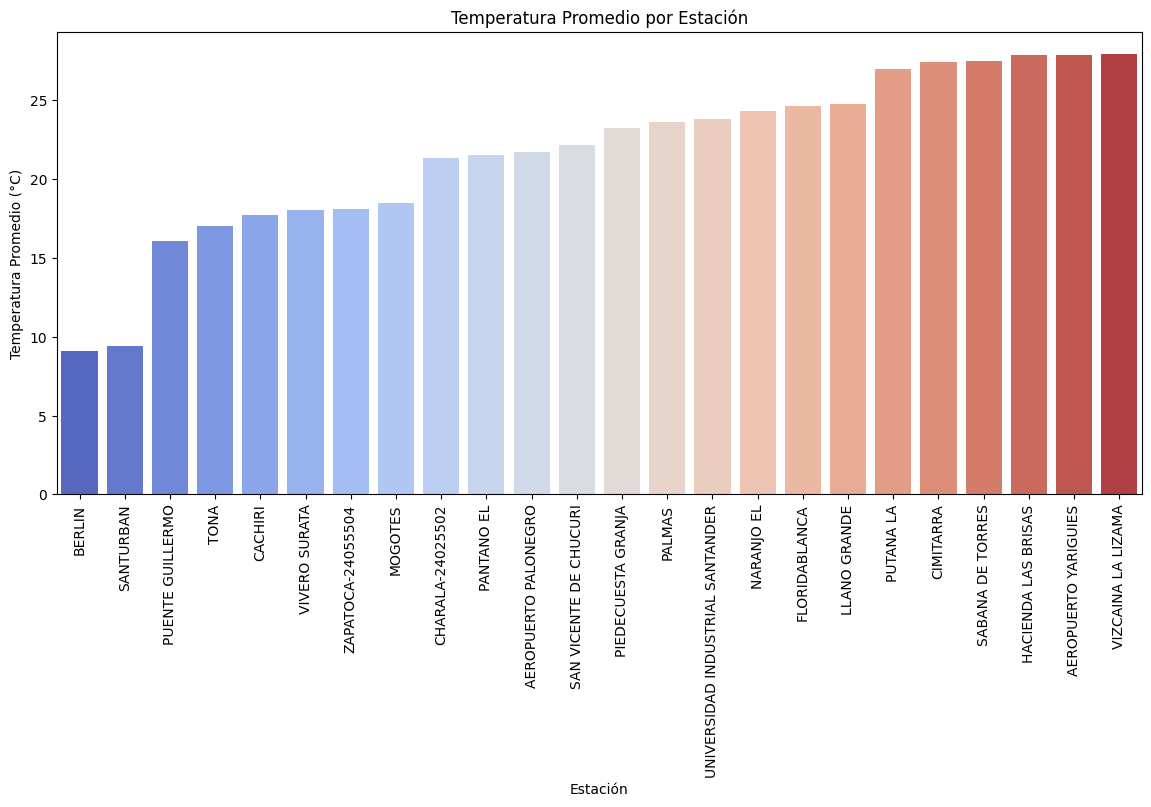

In [ ]:

plt.figure(figsize=(14, 6))
estaciones_prom = meteor_cleaned.groupby("NombreEstacion")["ValorObservado"].mean().sort_values()
sns.barplot(x=estaciones_prom.index, y=estaciones_prom.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Estación")
plt.ylabel("Temperatura Promedio (°C)")
plt.title("Temperatura Promedio por Estación")
plt.show()

### Temperatura Observada por Municipio
Este gráfico de línea muestra la variación de la temperatura (`ValorObservado`) a través de los diferentes municipios registrados en el dataset limpio. Permite una comparación visual de los rangos de temperatura y posibles diferencias sistemáticas entre municipios

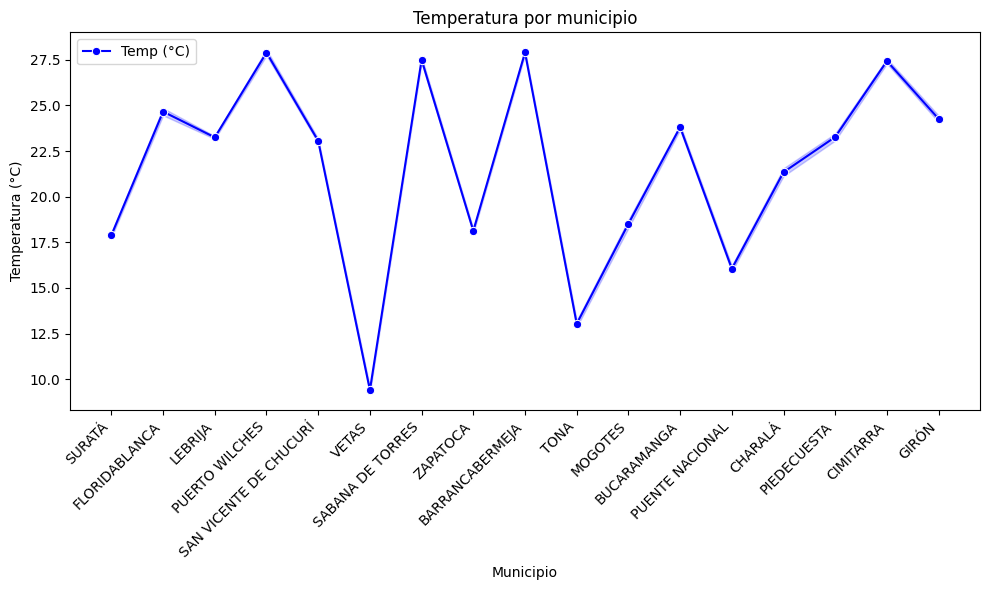

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(x='Municipio', y='ValorObservado', data=meteor_cleaned, marker='o', color='blue', label='Temp (°C)')
plt.title('Temperatura por municipio')
plt.xlabel('Municipio')
plt.ylabel('Temperatura (°C)')

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

### Número de Observaciones por Estación Meteorológica
Este gráfico de barras muestra la cantidad de registros de temperatura disponibles para cada estación meteorológica después de la limpieza de datos. Ayuda a identificar si algunas estaciones tienen significativamente más o menos datos que otras

<ipython-input-11-2b4fbc9efb52>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=meteor_cleaned, y='NombreEstacion', order = meteor_cleaned['NombreEstacion'].value_counts().index, palette='viridis') # o x='CodigoEstacion' si prefieres el código


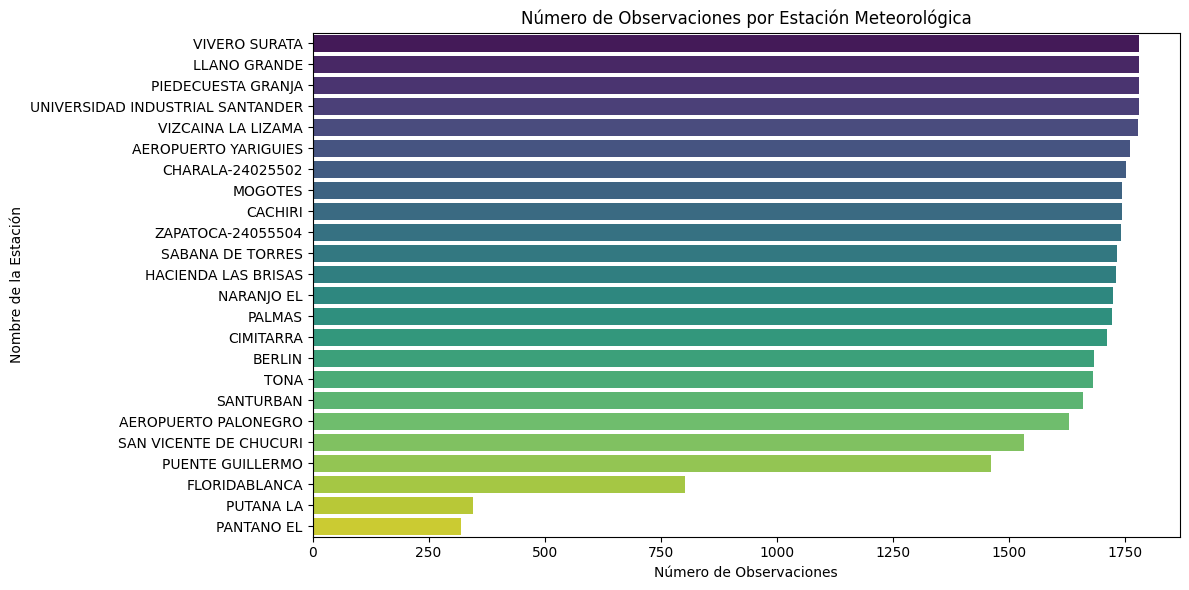

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=meteor_cleaned, y='NombreEstacion', order = meteor_cleaned['NombreEstacion'].value_counts().index, palette='viridis') # o x='CodigoEstacion' si prefieres el código
plt.title('Número de Observaciones por Estación Meteorológica')
plt.xlabel('Número de Observaciones')
plt.ylabel('Nombre de la Estación')
plt.tight_layout()
plt.show()

### Distribución de Coordenadas Geográficas (Latitud y Longitud)
Estos histogramas muestran la distribución de las latitudes y longitudes de las estaciones meteorológicas. Permiten visualizar la concentración geográfica de las estaciones.

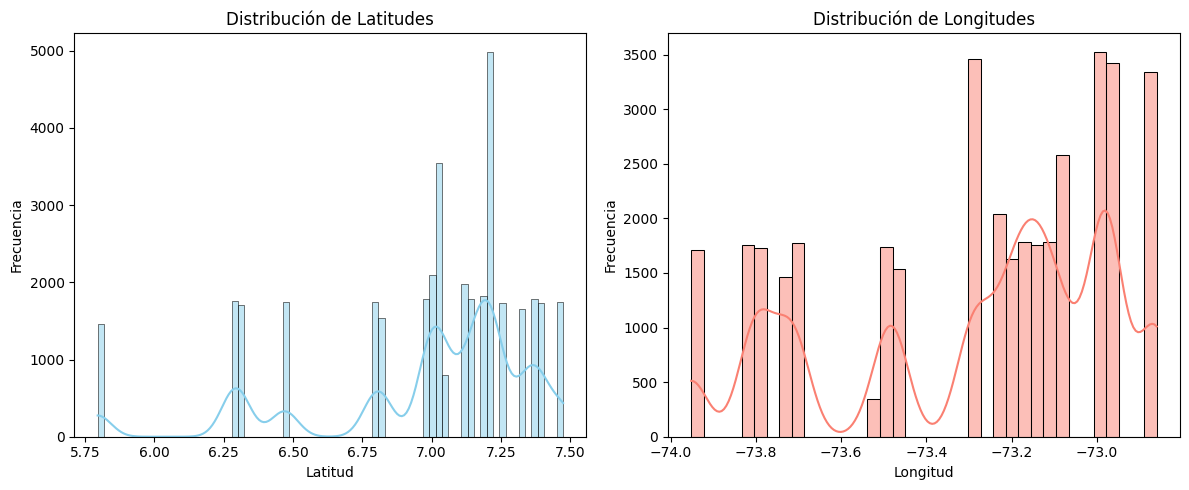

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(meteor_cleaned['Latitud'], kde=True, color='skyblue')
plt.title('Distribución de Latitudes')
plt.xlabel('Latitud')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(meteor_cleaned['Longitud'], kde=True, color='salmon')
plt.title('Distribución de Longitudes')
plt.xlabel('Longitud')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Distribución Espacial de Temperaturas Observadas
Este gráfico de dispersión muestra la ubicación geográfica (longitud vs. latitud) de cada observación de temperatura, donde el color de cada punto representa el valor de la temperatura. Ayuda a identificar si existen patrones espaciales en las temperaturas registradas.

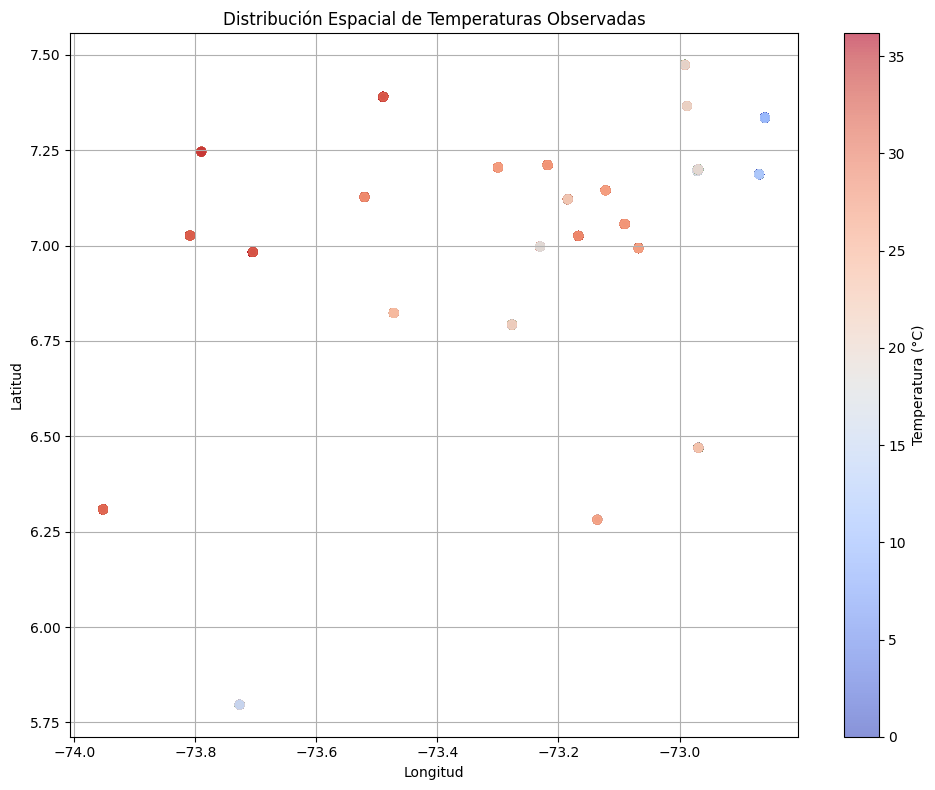

In [ ]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(meteor_cleaned['Longitud'], meteor_cleaned['Latitud'], c=meteor_cleaned['ValorObservado'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Temperatura (°C)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Distribución Espacial de Temperaturas Observadas')
plt.grid(True)
plt.tight_layout()
plt.show()

### Distribución de Observaciones por Zona Hidrográfica
Este gráfico de pastel muestra el porcentaje de observaciones de temperatura que corresponden a cada zona hidrográfica. Permite ver la representatividad de cada zona en el conjunto de datos.

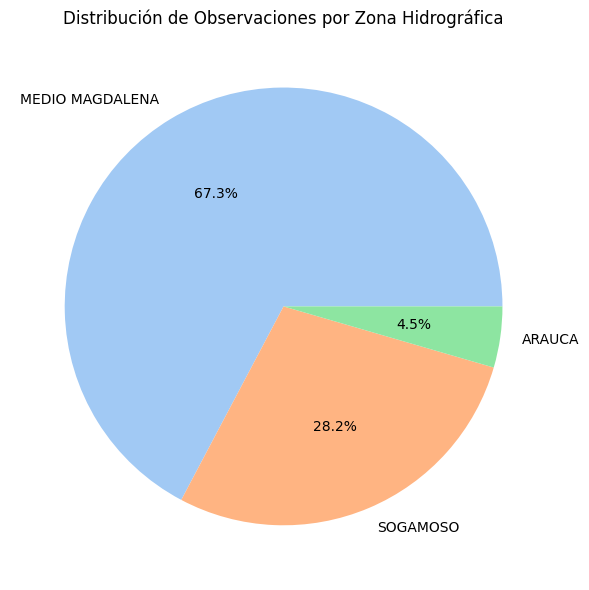

In [ ]:
plt.figure(figsize=(8, 6))
meteor_cleaned['ZonaHidrografica'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribución de Observaciones por Zona Hidrográfica')
plt.ylabel('') # Para quitar la etiqueta del eje y que se vea mejor el pie
plt.tight_layout()
plt.show()

#FASE 2

### Identificación del problema
Este es un problema de regresión, ya que buscamos predecir un valor numérico continuo (temperatura).

## Estimadores: DecisionTree, RandomForest y Support Vector Machine


In [ ]:
# 1. Crear las columnas Día, Mes y Año
meteor_cleaned['FechaObservacion'] = pd.to_datetime(meteor_cleaned['FechaObservacion'])

meteor_cleaned['Día'] = meteor_cleaned['FechaObservacion'].dt.day
meteor_cleaned['Mes'] = meteor_cleaned['FechaObservacion'].dt.month
meteor_cleaned['Año'] = meteor_cleaned['FechaObservacion'].dt.year

# 2. Definir variables de entrada (features) y variable de salida (target)
X = meteor_cleaned[['Latitud', 'Longitud', 'Día', 'Mes', 'Año']]
y = meteor_cleaned['ValorObservado']

In [ ]:
# 3. Separar datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Modelos de Machine Learning

# --- Decision Tree ---
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# --- Random Forest ---
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# --- Support Vector Machine (SVR) ---
svm_model = SVR()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
# 5. Evaluar los modelos

print("Resultados de los modelos:\n")

print("Decision Tree:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_tree)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_tree):.2f}\n")

print("Random Forest:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf):.2f}\n")

print("Support Vector Machine:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_svm)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_svm):.2f}\n")

Resultados de los modelos:

Decision Tree:
RMSE: 3.55
R2 Score: 0.69

Random Forest:
RMSE: 3.55
R2 Score: 0.69

Support Vector Machine:
RMSE: 6.42
R2 Score: -0.01



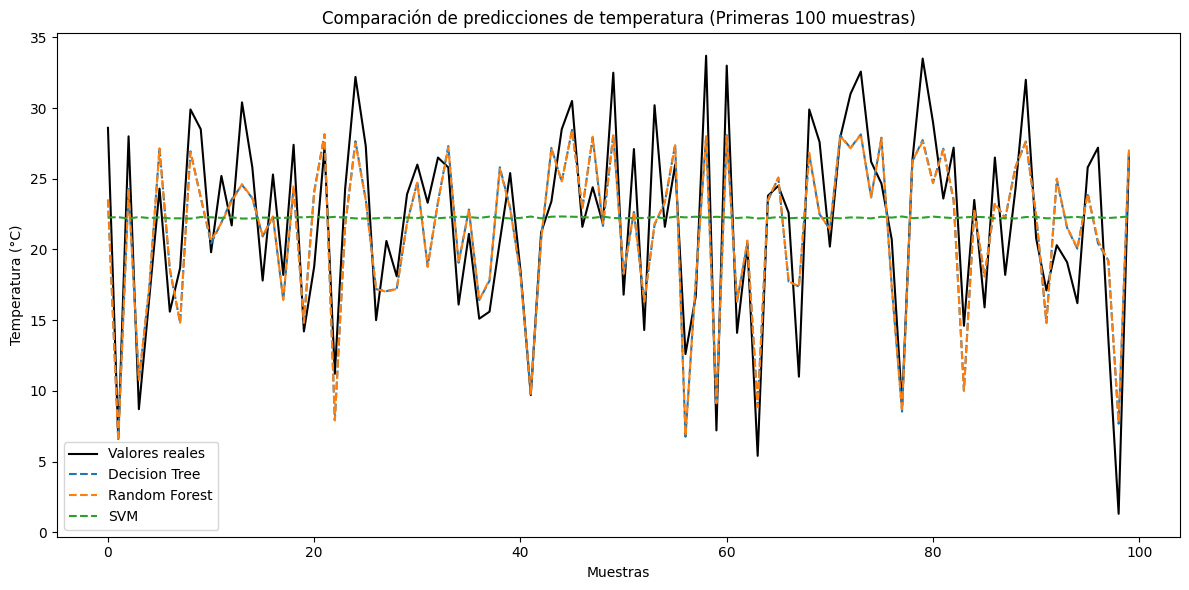

In [ ]:
# Definir cuántas muestras quieres visualizar
n_muestras = 100

# Graficar solo las primeras n_muestras
plt.figure(figsize=(12,6))
plt.plot(y_test.values[:n_muestras], label='Valores reales', color='black')
plt.plot(y_pred_tree[:n_muestras], label='Decision Tree', linestyle='--')
plt.plot(y_pred_rf[:n_muestras], label='Random Forest', linestyle='--')
plt.plot(y_pred_svm[:n_muestras], label='SVM', linestyle='--')
plt.title(f'Comparación de predicciones de temperatura (Primeras {n_muestras} muestras)')
plt.xlabel('Muestras')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Calcular MAE para cada modelo
mae_tree = mean_absolute_error(y_test.values, y_pred_tree)
mae_rf = mean_absolute_error(y_test.values, y_pred_rf)
mae_svm = mean_absolute_error(y_test.values, y_pred_svm)

# Mostrar resultados
print(f"MAE Decision Tree: {mae_tree:.2f} °C")
print(f"MAE Random Forest: {mae_rf:.2f} °C")
print(f"MAE SVM: {mae_svm:.2f} °C")


MAE Decision Tree: 2.99 °C
MAE Random Forest: 2.99 °C
MAE SVM: 5.01 °C


## Learning curves: DecisionTree, RandomForest y Support Vector Machine

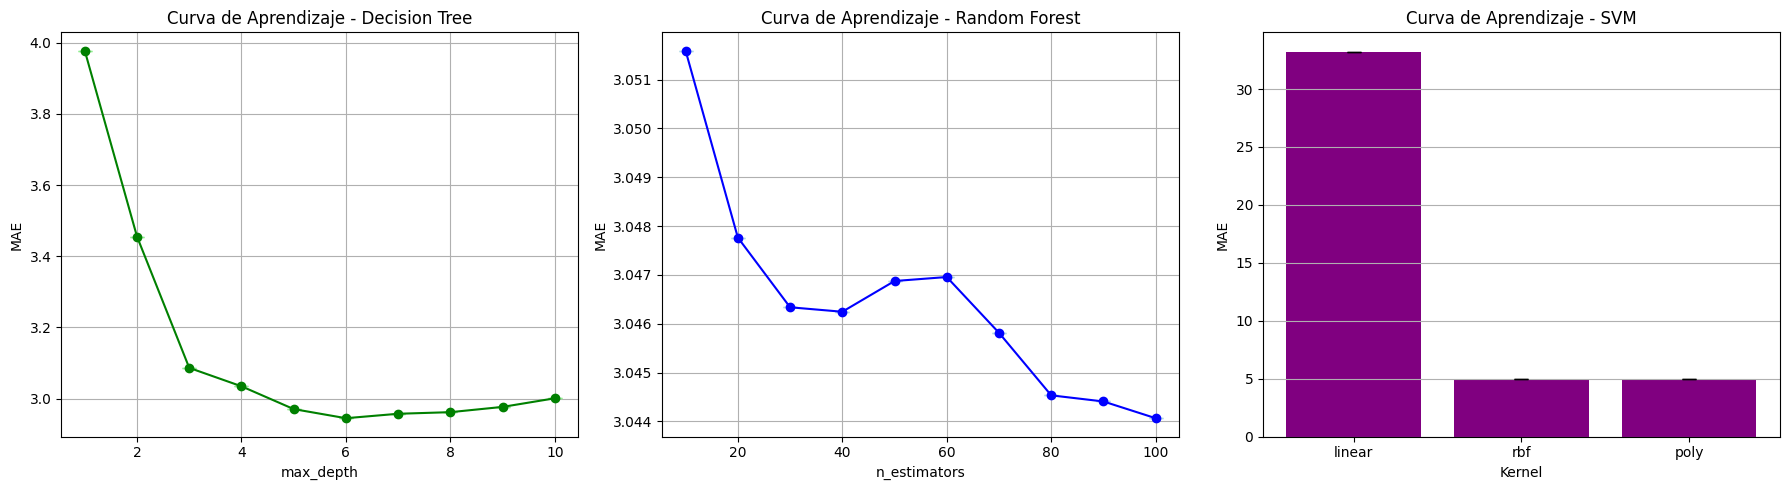

In [ ]:
# Usar solo una parte del conjunto de datos para un entrenamiento rápido
X_train_small = X_train.sample(frac=0.3, random_state=42)
y_train_small = y_train.loc[X_train_small.index]

# Función para evaluar el modelo
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test, repeticiones=2):
    maes = []
    for _ in range(repeticiones):
        modelo.fit(X_train, y_train)
        pred = modelo.predict(X_test)
        mae = mean_absolute_error(y_test, pred)
        maes.append(mae)
    return np.mean(maes), np.std(maes)

# Curva de aprendizaje para Decision Tree
max_depths = range(1, 11)
dt_mean_mae = []
dt_std_mae = []

for depth in max_depths:
    modelo = DecisionTreeRegressor(max_depth=depth, random_state=42)
    mean_mae, std_mae = evaluar_modelo(modelo, X_train_small, y_train_small, X_test, y_test)
    dt_mean_mae.append(mean_mae)
    dt_std_mae.append(std_mae)

# Curva de aprendizaje para Random Forest
n_estimators = range(10, 110, 10)
rf_mean_mae = []
rf_std_mae = []

for n in n_estimators:
    modelo = RandomForestRegressor(n_estimators=n, random_state=42)
    mean_mae, std_mae = evaluar_modelo(modelo, X_train_small, y_train_small, X_test, y_test)
    rf_mean_mae.append(mean_mae)
    rf_std_mae.append(std_mae)

# Curva de aprendizaje para SVM (kernel lineal, rbf, poly)
kernels = ['linear', 'rbf', 'poly']
svm_mean_mae = []
svm_std_mae = []

for k in kernels:
    modelo = SVR(kernel=k)
    mean_mae, std_mae = evaluar_modelo(modelo, X_train_small, y_train_small, X_test, y_test)
    svm_mean_mae.append(mean_mae)
    svm_std_mae.append(std_mae)

# Graficar resultados
plt.figure(figsize=(18, 5))

# --- Decision Tree ---
plt.subplot(1, 3, 1)
plt.errorbar(max_depths, dt_mean_mae, yerr=dt_std_mae, fmt='-o', color='green', ecolor='lightgreen', capsize=5)
plt.title('Curva de Aprendizaje - Decision Tree')
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.grid(True)

# --- Random Forest ---
plt.subplot(1, 3, 2)
plt.errorbar(n_estimators, rf_mean_mae, yerr=rf_std_mae, fmt='-o', color='blue', ecolor='lightblue', capsize=5)
plt.title('Curva de Aprendizaje - Random Forest')
plt.xlabel('n_estimators')
plt.ylabel('MAE')
plt.grid(True)

# --- SVM ---
plt.subplot(1, 3, 3)
plt.bar(kernels, svm_mean_mae, yerr=svm_std_mae, capsize=5, color='purple')
plt.title('Curva de Aprendizaje - SVM')
plt.xlabel('Kernel')
plt.ylabel('MAE')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
# --- Usa solo el 20% de los datos ---
X_subset = X.sample(frac=0.2, random_state=42)
y_subset = y.loc[X_subset.index]

In [ ]:
# --- Función general para curvas ---
def show_curve(est, X_data, y_data, param_name, param_values):
    means = []
    stds = []

    for val in param_values:
        # Setea el parámetro dinámicamente
        model = est.set_params(**{param_name: val})

        s = cross_val_score(model, X_data, y_data,
                            cv=KFold(5, shuffle=True, random_state=42),
                            scoring=make_scorer(mean_absolute_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.array(means)
    stds = np.array(stds)

    plt.plot(param_values, means, color='black', label='MAE')
    plt.fill_between(param_values, means-stds, means+stds, color='blue', alpha=0.5, label='std')
    plt.xlabel(param_name)
    plt.ylabel('MAE')
    plt.legend()

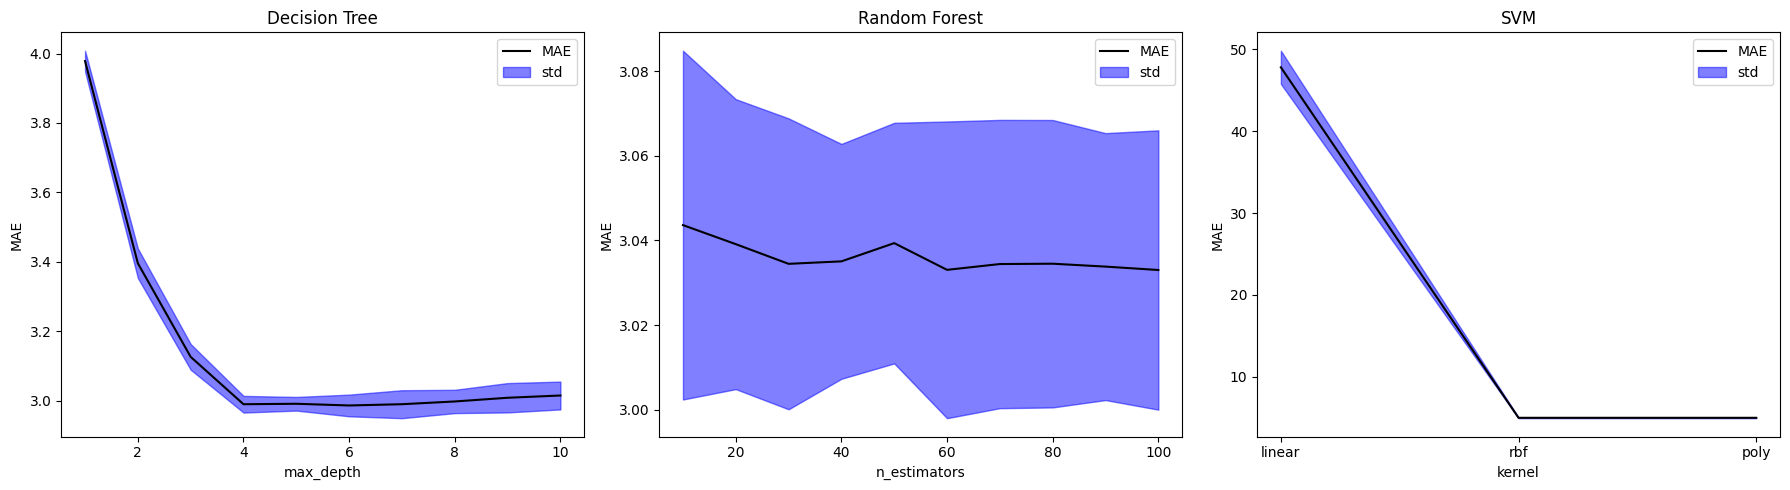

In [ ]:
# --- Graficar los tres modelos ---
plt.figure(figsize=(18,5))

# Decision Tree
plt.subplot(1,3,1)
show_curve(DecisionTreeRegressor(), X_subset, y_subset, 'max_depth', range(1,11))
plt.title('Decision Tree')

# Random Forest
plt.subplot(1,3,2)
show_curve(RandomForestRegressor(), X_subset, y_subset, 'n_estimators', range(10, 110, 10))
plt.title('Random Forest')

# SVM
plt.subplot(1,3,3)
show_curve(SVR(), X_subset, y_subset, 'kernel', ['linear', 'rbf', 'poly'])
plt.title('SVM')

plt.tight_layout()
plt.show()

## Learning curve: Cross-validation

In [ ]:
# Cross-validation para DT
dt_model = DecisionTreeRegressor()  # sin parámetros
scores = cross_val_score(
    dt_model,
    X_subset,
    y_subset,
    cv=5,
    scoring=make_scorer(mean_absolute_error)
)

# Mostrar resultados
print(f"MAE promedio: {scores.mean():.4f}")
print(f"Desviación estándar: {scores.std():.4f}")


MAE promedio: 3.0384
Desviación estándar: 0.0635


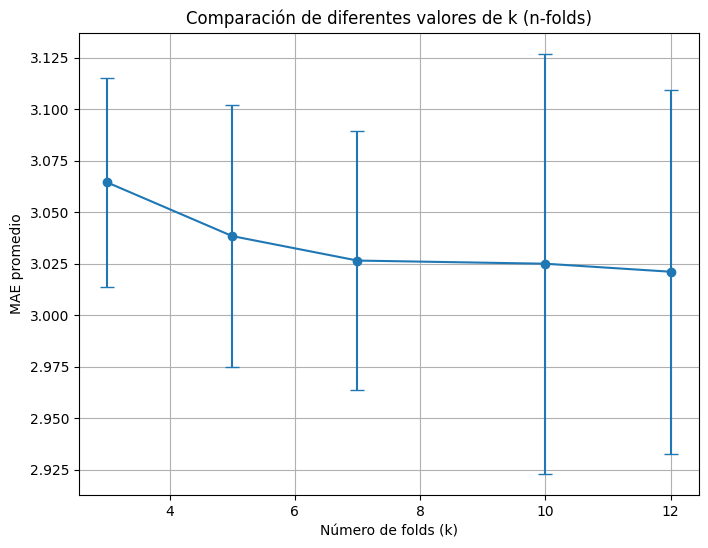

In [ ]:
#Cross-validation para distintos valores k-folds
k_values = [3,5,7,10,12]
mae_means = []
mae_stds = []

for k in k_values:
    model = DecisionTreeRegressor()
    scores = cross_val_score(
        model,
        X_subset,  # usa una muestra para acelerar
        y_subset,
        cv=k,
        scoring=make_scorer(mean_absolute_error)
    )
    mae_means.append(scores.mean())
    mae_stds.append(scores.std())

# Graficar resultados
plt.figure(figsize=(8,6))
plt.errorbar(k_values, mae_means, yerr=mae_stds, fmt='-o', capsize=5)
plt.xlabel('Número de folds (k)')
plt.ylabel('MAE promedio')
plt.title('Comparación de diferentes valores de k (n-folds)')
plt.grid(True)
plt.show()



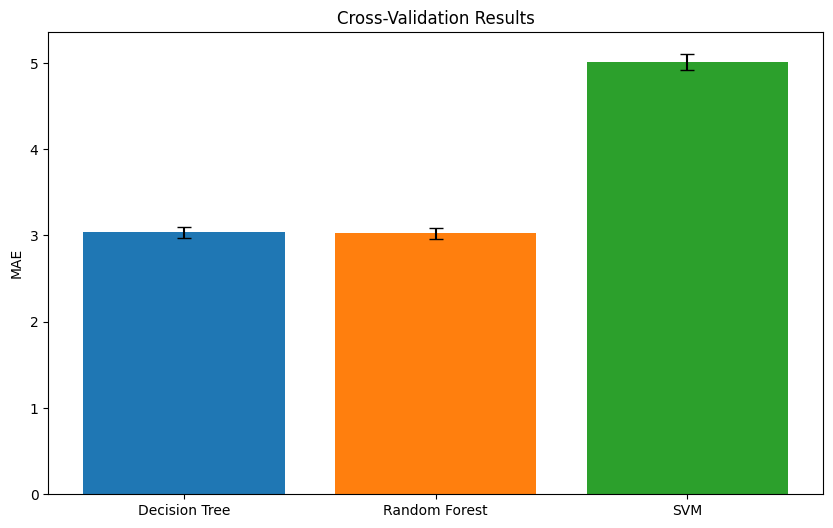

Cross-Validation Results:
Decision Tree: MAE = 3.0384 (+/- 0.0635)
Random Forest: MAE = 3.0267 (+/- 0.0618)
SVM: MAE = 5.0114 (+/- 0.0890)


In [ ]:
# Cross-validation para Decision Tree, RandomForest y SVM
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR()
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_subset, y_subset, cv=5, scoring=make_scorer(mean_absolute_error))
    results[name] = {
        'mean_mae': scores.mean(),
        'std_mae': scores.std()
    }

# Graficar resultados
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.bar(name, result['mean_mae'], yerr=result['std_mae'], capsize=5)

plt.ylabel('MAE')
plt.title('Cross-Validation Results')
plt.show()


#Mostrar resultados
print("Cross-Validation Results:")
for name, result in results.items():
    print(f"{name}: MAE = {result['mean_mae']:.4f} (+/- {result['std_mae']:.4f})")


# FASE 3
## Redes Neuronales y Clustering

En esta fase implementaremos:
1. Tres configuraciones de redes neuronales para regresión
2. Reducción de dimensionalidad con PCA
3. Algoritmos de clustering (K-Means y DBSCAN)

NOTA: Para que los codigos funcionen correctamente debe ejecutar los primeros tres pasos de la fase dos ya que estos contiene la creacion de las columnas utilizadas a continuación

In [ ]:
### Preprocesamiento para Redes Neuronales

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos escalados
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Función para crear modelos
def create_model(n_layers, n_neurons):
    model = Sequential()

    # Capa de entrada
    model.add(Dense(n_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)))

    # Capas ocultas
    for _ in range(n_layers - 1):
        model.add(Dense(n_neurons, activation='relu'))

    # Capa de salida
    model.add(Dense(1))

    # Compilar modelo
    model.compile(optimizer=Adam(learning_rate=0.001),
                 loss='mse',
                 metrics=['mae'])

    return model

# Crear los tres modelos con diferentes configuraciones
models = {
    '3_layers': create_model(3, 128),
    '6_layers': create_model(6, 128),
    '10_layers': create_model(10, 128)
}

# Entrenar los modelos
history = {}
for name, model in models.items():
    print(f"\nEntrenando modelo con {name}...")
    history[name] = model.fit(
        X_train_scaled, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Entrenando modelo con 3_layers...
Epoch 1/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 99.1507 - mae: 7.1237 - val_loss: 14.9226 - val_mae: 3.1198
Epoch 2/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14.2351 - mae: 3.0765 - val_loss: 16.8466 - val_mae: 3.5198
Epoch 3/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 13.6502 - mae: 3.0301 - val_loss: 12.8286 - val_mae: 2.9865
Epoch 4/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13.0250 - mae: 2.9771 - val_loss: 13.3072 - val_mae: 2.9114
Epoch 5/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13.2088 - mae: 2.9952 - val_loss: 13.0053 - val_mae: 3.0736
Epoch 6/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 12.9293 - mae: 2.9565 - val_loss: 12.9841 - val_mae: 3.0341
Epoch 7/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13.1414 - mae: 2.9882 - val_loss: 13.5006 - val_mae: 2.8833
Epoch 8/10
748/748 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 12.8552 - mae: 2.9564 - val_loss: 12.5251 - val_mae: 2.9513
Epoch

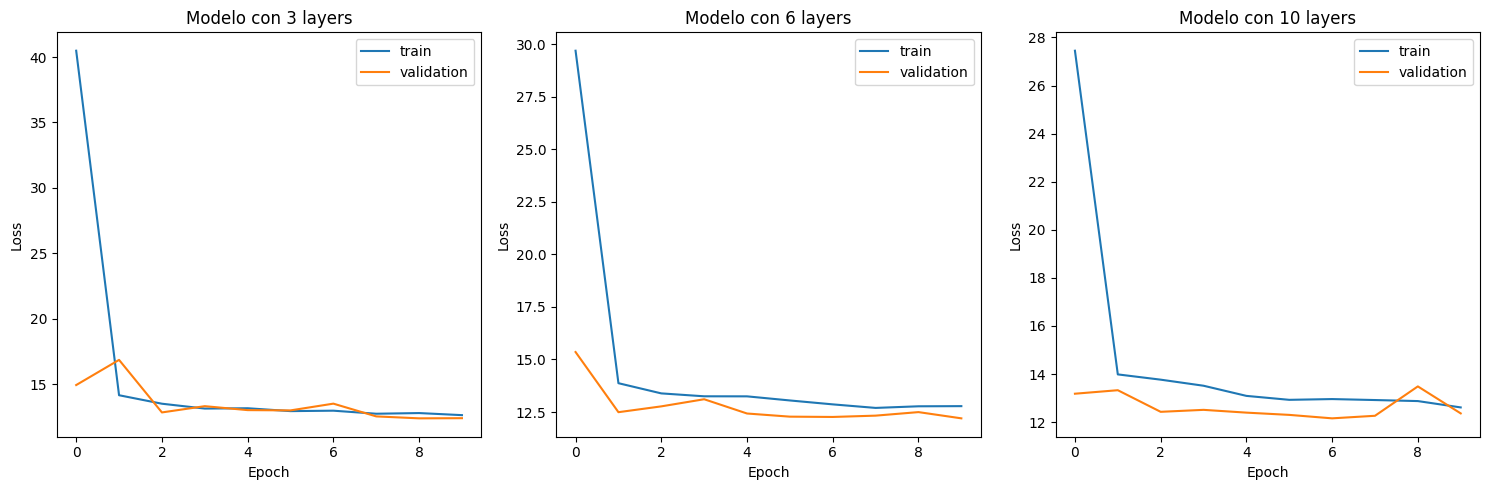


Resultados de evaluación:

Modelo con 3_layers:
MAE: 2.9288
MSE: 12.6396

Modelo con 6_layers:
MAE: 2.9529
MSE: 12.5233

Modelo con 10_layers:
MAE: 2.9010
MSE: 12.6540


In [ ]:
# Visualizar las curvas de aprendizaje de los modelos
plt.figure(figsize=(15, 5))

for i, (name, hist) in enumerate(history.items(), 1):
    plt.subplot(1, 3, i)
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='validation')
    plt.title(f'Modelo con {name.replace("_", " ")}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

plt.tight_layout()
plt.show()

# Evaluar los modelos
print("\nResultados de evaluación:")
for name, model in models.items():
    loss, mae = model.evaluate(X_test_scaled, y_test, verbose=0)
    print(f"\nModelo con {name}:")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {loss:.4f}")

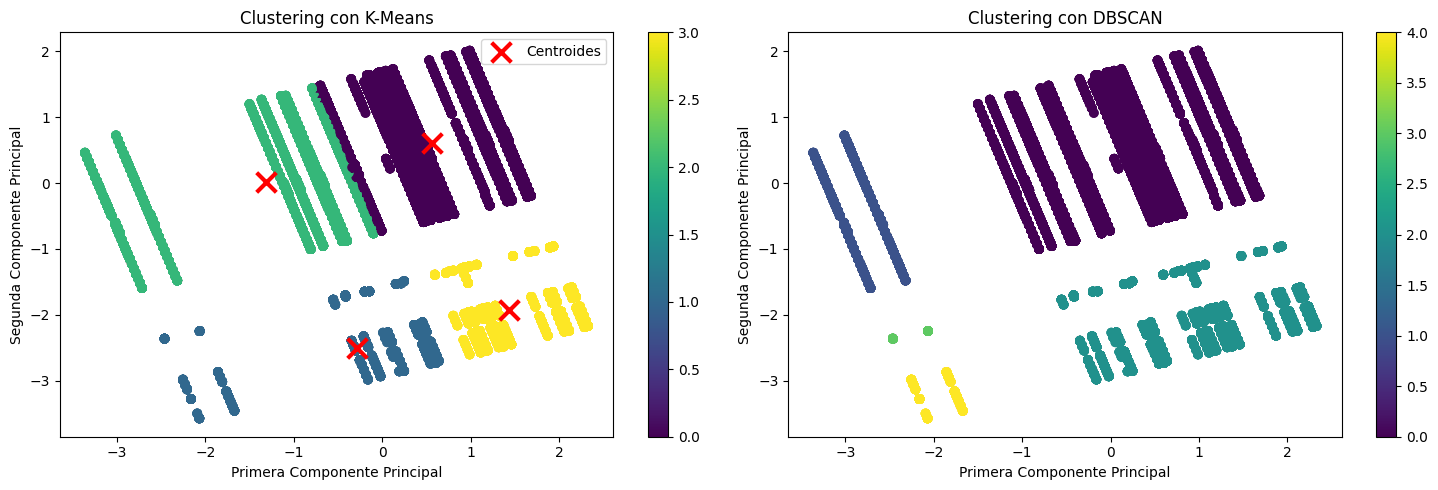

Varianza explicada por cada componente principal:
Componente 1: 0.3418
Componente 2: 0.3341

Varianza total explicada: 0.6759

Resultados de K-Means:
Número de puntos en cada cluster: [20019  2342 11639  3378]

Resultados de DBSCAN:
Número de clusters encontrados: 5
Número de puntos en cada cluster: [    0 28931  2727  5273    82   365]


In [ ]:
## Reducción de Dimensionalidad y Clustering

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_pca)

# Visualizar resultados
plt.figure(figsize=(15, 5))

# Plot K-Means
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=200, linewidths=3, label='Centroides')
plt.title('Clustering con K-Means')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.legend()
plt.colorbar(scatter)

# Plot DBSCAN
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('Clustering con DBSCAN')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.colorbar(scatter)

plt.tight_layout()
plt.show()

# Analizar la varianza explicada por las componentes principales
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {ratio:.4f}")
print(f"\nVarianza total explicada: {sum(explained_variance_ratio):.4f}")

# Analizar resultados de clustering
print("\nResultados de K-Means:")
print(f"Número de puntos en cada cluster: {np.bincount(kmeans_labels)}")

print("\nResultados de DBSCAN:")
print(f"Número de clusters encontrados: {len(np.unique(dbscan_labels))}")
print(f"Número de puntos en cada cluster: {np.bincount(dbscan_labels + 1)}")